In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print(df.shape)

(200, 4)


In [4]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


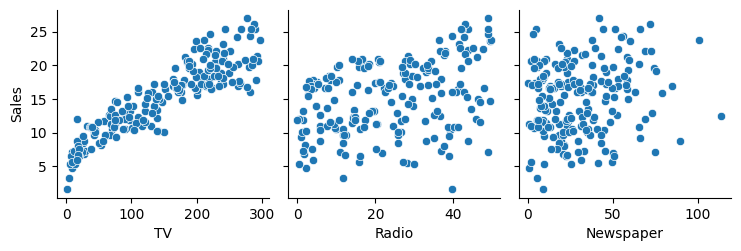

In [5]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

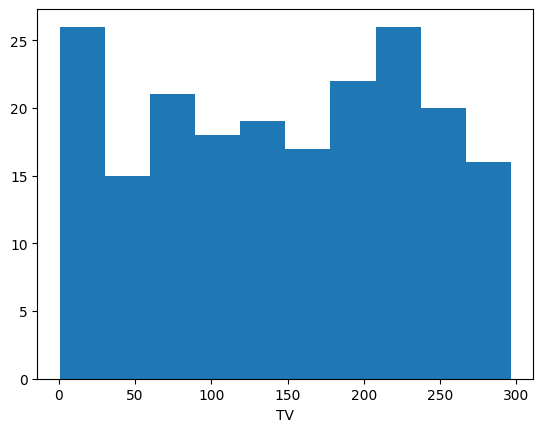

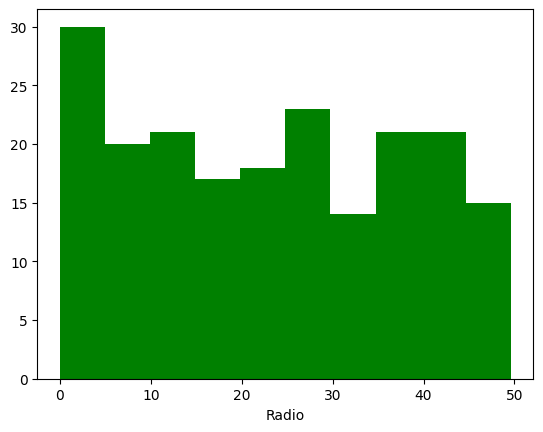

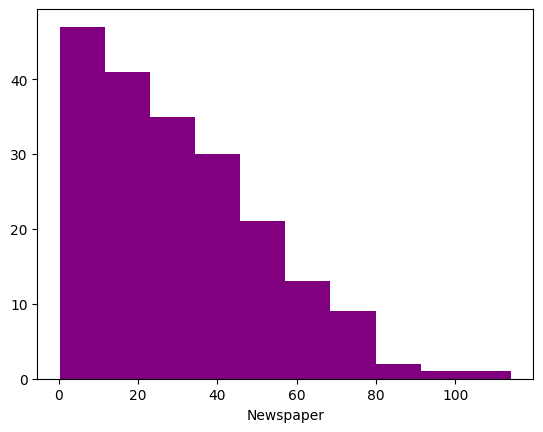

In [6]:
plt.hist(df['TV'], bins=10)
plt.xlabel('TV')
plt.show()

plt.hist(df['Radio'], bins=10, color="green")
plt.xlabel('Radio')
plt.show()

plt.hist(df['Newspaper'], bins=10, color="purple")
plt.xlabel('Newspaper')
plt.show()

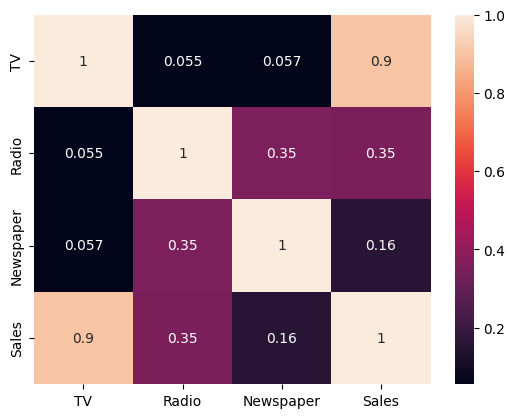

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV']], df['Sales'], test_size=0.3, random_state=0)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [16]:
res = model.predict(X_test)
print(res)

[10.93127621  9.88042193 12.09159447 22.99968079 16.45920756 10.21976029
  7.6199906  20.28497391  8.4464437  17.95886418 21.44529217 11.91645209
 15.71485245 17.42249065 11.32534656 13.72260788 21.68063975  7.18213465
 11.23230217 18.82362968 22.88474361 14.82272095 16.72739433 14.35202581
 10.07198391 13.88133066 16.20744039 18.36388094 19.40378881  8.51759529
 10.85465142 18.03001578 22.50709285 20.3725451   7.86628457  8.16731053
 10.40584907 17.03936669 10.88749061  8.51212209  9.16343282  8.86788005
 14.96502414 18.61564811 18.93309367 12.76479799  7.6145174   8.06879294
 14.02363385 12.86878878 13.15339515 19.70481478 21.03480222 17.26376787
  9.59034237 10.55362545 23.17482317 16.58509115 18.22705095  7.54336581]


In [17]:
print(model.coef_)
print(model.intercept_)

[0.05473199]
7.143822253515246


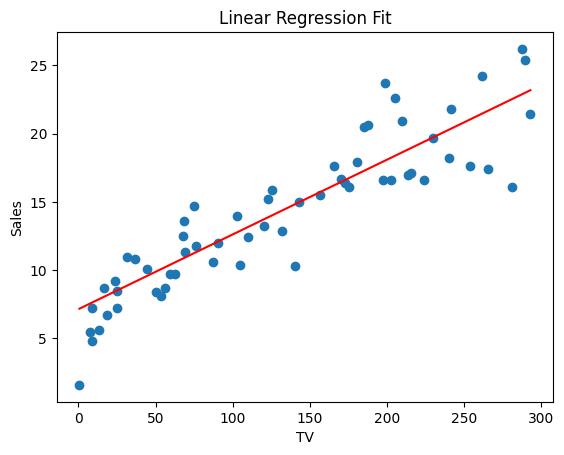

In [18]:
plt.scatter(X_test, Y_test)
plt.plot(np.sort(X_test.values.flatten()), np.sort(model.predict(X_test)), color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.show()